In [2]:
import numpy as np
import pandas as pd
import random
import math

In [3]:
def uniform_circle_dataset(centers, radii, n = 10):
    data = {'y':[], 'x1':[], 'x2':[]}
    for label, (center, radius) in enumerate(zip(centers, radii)):
        for _ in range(n):
            a = random.uniform(0, 2 * math.pi)
            r = radius * math.sqrt(random.uniform(0, 1))
            data['y'].append(label * 2 - 1)
            data['x1'].append(center[0] + r * math.cos(a))
            data['x2'].append(center[1] + r * math.sin(a))
    return pd.DataFrame.from_dict(data)

In [4]:
def led_dataset(labels = None, noise = 0.0, samples = 100):
    patterns = {0:'1110111',
                1:'0010010',
                2:'1011101',
                3:'1011011',
                4:'0111010',
                5:'1101011',
                6:'1101111',
                7:'1010010',
                8:'1111111',
                9:'1111011'
                }

    cols = ['top', 'top_left', 'top_right', 'middle', 'bottom_left', 
            'bottom_right', 'bottom', 'y']
    
    if labels is None:
        labels = list(range(10))

    X = []
    for label in labels:
        for _ in range(samples):
            x = [int(v) for v in patterns[label]]
            x = [(v + 1) % 2 if random.random() < noise else v for v in x]
            x = ['on' if v == 1 else 'off' for v in x]
            X.append(x)
    X = list(map(list, zip(*X)))
            
    Y = []
    for label in labels:
        Y += [label] * samples
    X.append(Y)
            
    return pd.DataFrame({col:data for col, data in zip(cols, X)})

In [6]:
import matplotlib.pyplot as plt

def plot_led(D, cols, size = 3, label = True):
    rows = math.ceil(len(D) / cols)
    fig, axes = plt.subplots(rows, cols, sharex = False, sharey = False, figsize=(size * cols, size * rows))
    axes = axes.flatten().tolist()
    
    for axis in axes:
        axis.set_xticks([])
        axis.set_yticks([])
        axis.axis('off')
        margin = size * 0.2
        axis.set_xlim((-margin, size + margin))
        axis.set_ylim((size - margin, 3*size + margin))
        
    for idx, row in D.iterrows():
        axis = axes[idx]
        axis.axis('on')
    
        if label:
            axis.set_title(row['y'])
                    
        for feature in row.keys():
            if feature == 'y' or row[feature] == 'off':
                continue
            if feature == 'top':
                axis.plot((0, size), (3*size, 3*size), lw = 10, solid_capstyle='round', color = 'black')
            if feature == 'top_left':
                axis.plot((0, 0), (3*size, 2*size), lw = 10, solid_capstyle='round', color = 'black')
            if feature == 'top_right':
                axis.plot((size, size), (3*size, 2*size), lw = 10, solid_capstyle='round', color = 'black')
            if feature == 'middle':
                axis.plot((0, size), (2*size, 2*size), lw = 10, solid_capstyle='round', color = 'black')
            if feature == 'bottom_left':
                axis.plot((0, 0), (2*size, size), lw = 10, solid_capstyle='round', color = 'black')
            if feature == 'bottom_right':
                axis.plot((size, size), (2*size, size), lw = 10, solid_capstyle='round', color = 'black')
            if feature == 'bottom':
                axis.plot((0, size), (size, size), lw = 10, solid_capstyle='round', color = 'black')
        
    plt.show()

In [7]:
#D = led_dataset(samples = 1, noise = 0.0)

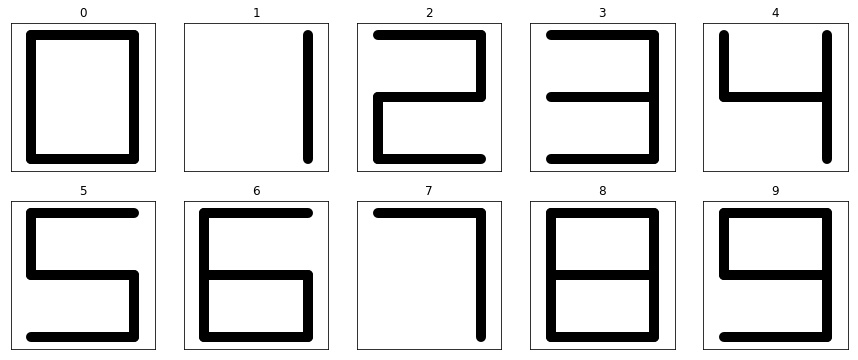

In [8]:
#plot_led(D, cols = 5)